# Exercise 4.9 - Part 2

### Step 1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating a path
path = r'D:\Nov Laptop\Ivan Dimitrov - Data Analyst (CF)\13-06-2023 Instacart Basket Analysis'

In [4]:
# Importing the Latest "ords_prods_customer" data set from Part 1
df_part1 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','ords_prods_cust_combined_4.9_Part1.pkl'))

In [5]:
# Check the data
df_part1.head()

,order_id,User_ID,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date_Joined,Dependants,Fam_Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### Step 2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

<Axes: >

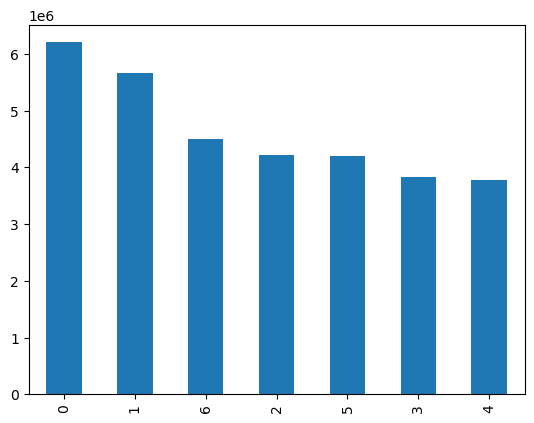

In [6]:
# Creating a Bar Chart
df_part1['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

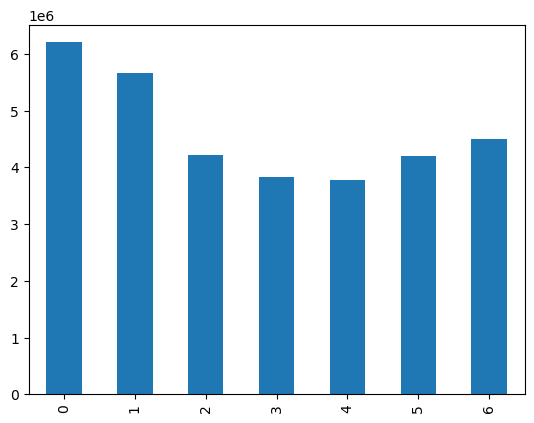

In [7]:
# Bar chart sorted by index
df_part1['orders_day_of_week'].value_counts().sort_index().plot.bar()

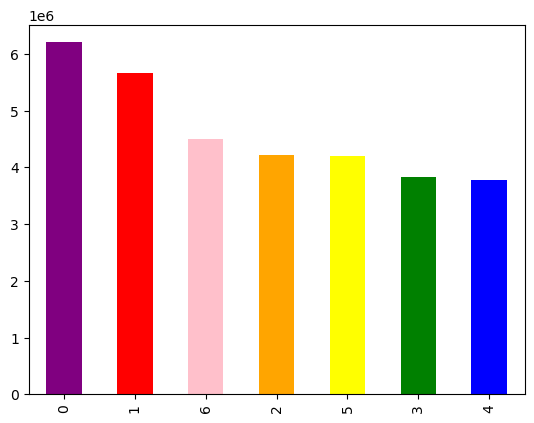

In [8]:
# Applying color to the chart
bar = df_part1['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

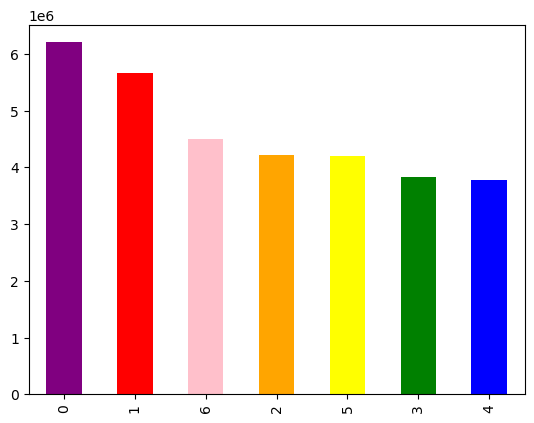

In [9]:
bar.figure

In [10]:
# Exporting the Bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

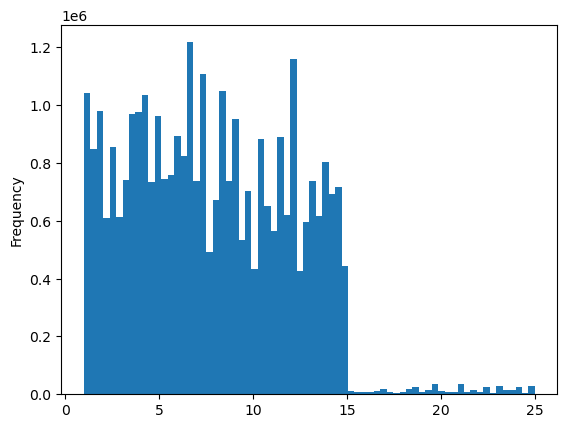

In [11]:
# Creating a Histogram
hist = df_part1['prices'].plot.hist(bins = 70)

In [12]:
# Exporting the Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

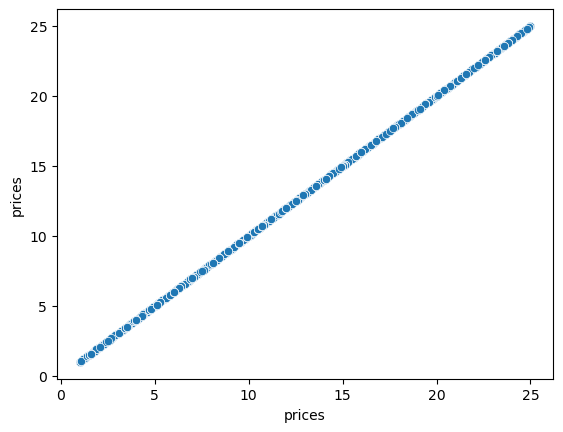

In [13]:
# Creating a Scatterplot
scat_plot = sns.scatterplot(x = 'prices', y = 'prices',data = df_part1)

In [14]:
# Exporting the ScatterPlot
scat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_plot_prices.png'))

In [15]:
# Creating Sample Data
np.random.seed(4)

In [16]:
# Creating a list holding True/False values to the test np.random.rand() <= 0.7
dev = np.random.rand(len(df_part1)) <= 0.7

In [17]:
# Store 70% of the sample in the dataframe "big"
big = df_part1[dev]

In [18]:
# Store 30% of the sample in the dataframe "small"
small = df_part1[~dev]

In [19]:
len(df_part1)

32404161

In [20]:
# Checking for equality
len(big) + len(small)

32404161

In [21]:
# Creating another dataframe to include only "orders_day_of_week" and "prices" from the small sample data
df_2 = small[['orders_day_of_week','prices']]

In [22]:
# Checking
df_2

,orders_day_of_week,prices
0,2,9.000000
2,3,9.000000
3,4,9.000000
6,1,9.000000
10,2,12.500000
...,...,...
32404151,1,10.703125
32404152,4,10.703125
32404154,6,10.703125
32404156,4,10.703125


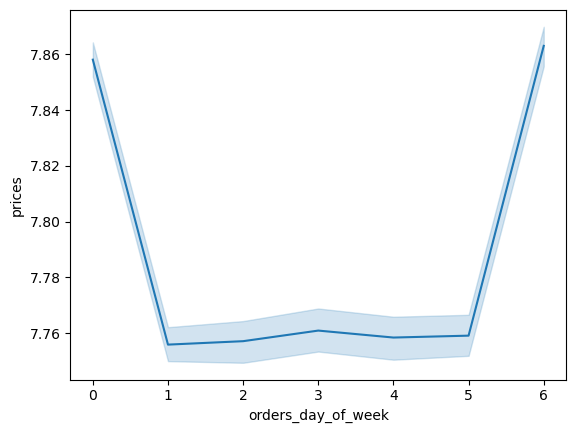

In [23]:
# Creating a line graph from the sample data "df_2"
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
# Exporting the Line Graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_graph(ord_day_of_week+prices).png'))

### Step 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
#### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

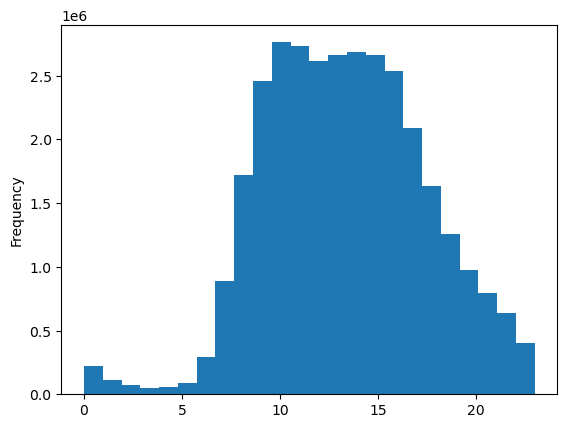

In [25]:
# Histogram for "order_hour_of_day" column with 24 bins due to the amount of hours in a day
hist_2 = df_part1['order_time_of_day'].plot.hist(bins = 24)

In [26]:
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist(order_hour_of_day).png'))

#### The Histogram demonstrates that the shopping activity is at its lowest during the hours of between midnight to 6AM. Peak shopping activity is between the hours of 9AM and 16PM. And from 16PM until 23PM we see a decline in shopping activity.

### Step 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [27]:
# Visualizing all column names
pd.set_option('display.max_columns', None)

In [28]:
df_part1.head()

,order_id,User_ID,order_number,orders_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day,Busiest_Days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days,frequency_flag,First Name,Last Name,Gender,State,Age,Date_Joined,Dependants,Fam_Status,Income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367535,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Average Orders,10,New customer,6.367535,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most Orders,10,New customer,6.367535,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Average Orders,10,New customer,6.367535,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most Orders,10,New customer,6.367535,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


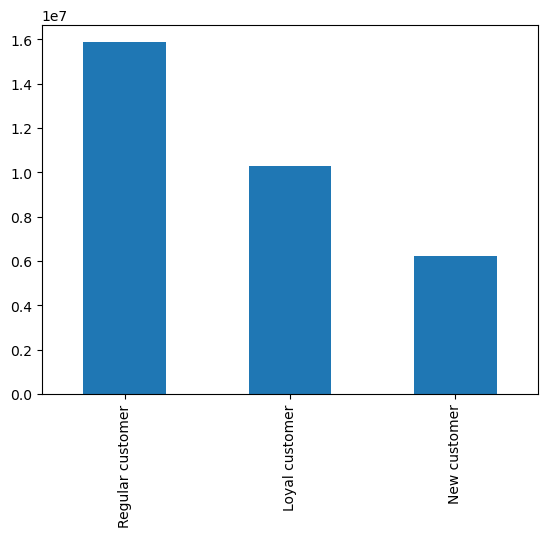

In [29]:
# Creating a Bar Chart from the "loyalty_flag" column
bar_2 = df_part1['loyalty_flag'].value_counts().plot.bar()

In [30]:
# Exporting the Bar Chart for "loyalty_flag"
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag.png'),bbox_inches='tight')

### Step 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [31]:
# Creating another dataframe to include only "orders_day_of_week" and "prices" from the small sample data
df_line2 = small[['order_time_of_day','prices']]

In [32]:
# Checking
df_line2

,order_time_of_day,prices
0,8,9.000000
2,12,9.000000
3,7,9.000000
6,9,9.000000
10,8,12.500000
...,...,...
32404151,18,10.703125
32404152,20,10.703125
32404154,12,10.703125
32404156,23,10.703125


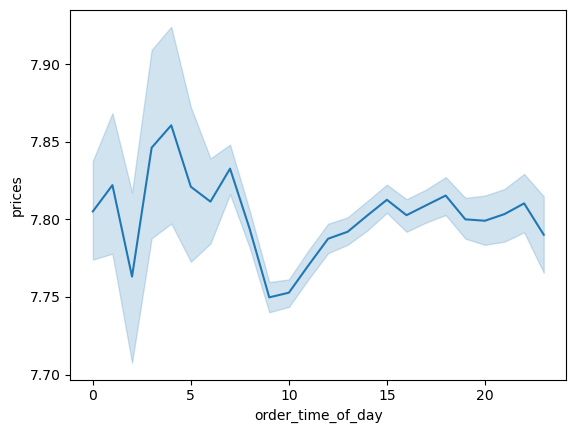

In [33]:
# Creating a line graph from the sample data "df_line2"
line2 = sns.lineplot(data = df_line2, x = 'order_time_of_day',y = 'prices')

In [34]:
# Exporting the Line Graph
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line2_graph(ord_time_of_day+prices).png'))

### Step 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
#### In a markdown cell beneath your line chart, describe what the line chart shows.

In [35]:
# Creating Sample Data to determine if there's a connection between age and number of dependents
df_line3 = small[['Age', 'Dependants']]

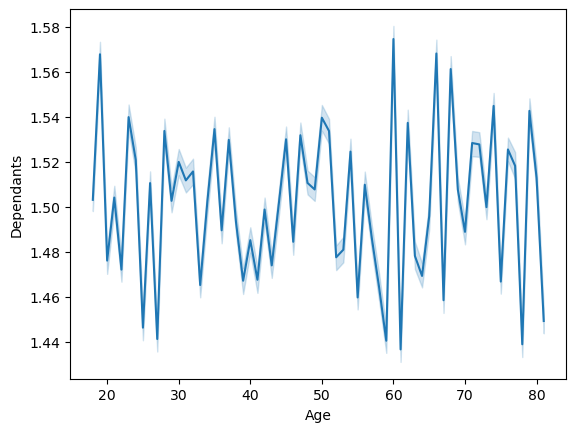

In [36]:
# Creating the Line Chart
line_3 = sns.lineplot(data = df_line3, x = 'Age', y = 'Dependants')

#### There dosn't seem to be any dramatic relation between age number and Nr of dependants. Though in the 20's the spike could be due to people getting into relationships and being more dependant. For the 60's spike it's rather easy to explain - older people are quite dependant on younger people. These spikes from 60 onward are quite visible and hold the same theory of explanation.

In [37]:
# Exporting the Line Graph
line_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line3_graph(age vs dependants).png'))

### Step 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
#### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

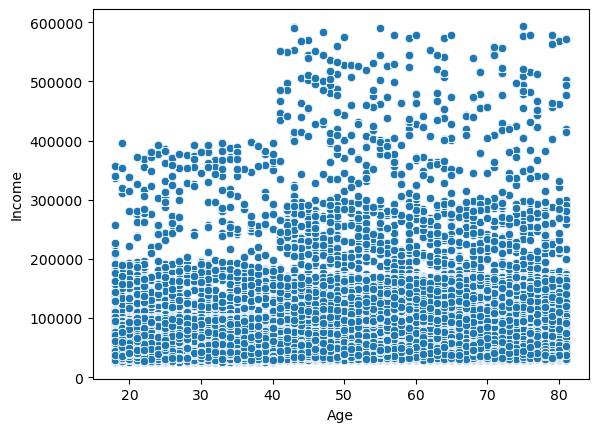

In [38]:
# Creating a Scatterplot
scat_plot2 = sns.scatterplot(x = 'Age', y = 'Income',data = df_part1)

In [39]:
# Exporting the ScatterPlot
scat_plot2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scat_plot2(age vs income).png'))

#### As we see most of the population earns less than 200K a year. Though that is visible, we can also spot that from the age of 40 and up there's quite a density for people earning from 200K to 300K yearly. There are also cases for people earning from 300K and up, but as we see there are a relatively very small portion of the population.

### Step 8: Export your visualizations as “.png” files in your relevant project folder.

#### All Exporting was done below the respective graphs.

### Since we haven't done any changes to the actual data set, there's no need to export the data set. Only thing to do is save the Notebook.